In [1]:
import pandas as pd 
import numpy as np 


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_recall_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [3]:
## bike share data as classification 
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

<Axes: xlabel='count', ylabel='Count'>

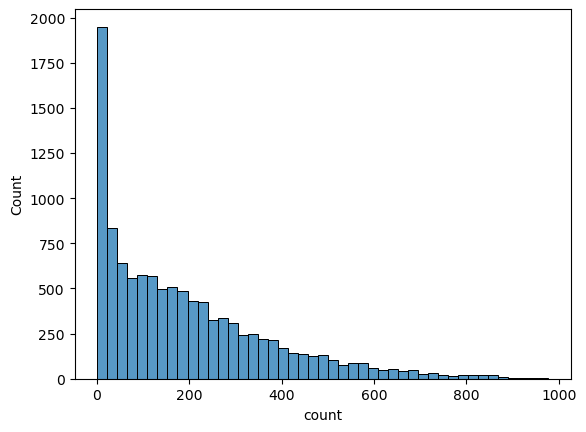

In [4]:
# change output variable to category --> one binary and one multi class
#first plot bike total count to see if create some structure to make some kind of even discussion to look at top 30 50 or 75 % 
sns.histplot(bikes['count'])


In [5]:
#midpoint for rough estimation --. for binary use 145 midpoint high vs low 
# anything over median high anything under median low 
bikes['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [6]:
# binary output variable --> high number of rentals =1 // low number of rentals = 0 
# converting count variable into categorical --> talking about classification problems so need to convert to categorical variables 
bikes['binary_output'] = bikes['count'].apply(lambda x: 1 if x >= 145 else 0)

In [7]:
bikes 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,binary_output
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,1
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,0


In [8]:
# for multiclass 
# can use KNN for multiclass problmes 
bikes['multiclass_output'] = bikes['count'].apply(lambda x: 1 if x >= 0 and x <42 else 2 if x>= 42 and x <145 else 3 if x>=145 and x<284 else 4)


now have binary and multi class output 
gonna start with binary--. use logistic regression, knn and nieve bays 

In [9]:
#check data balance 
bikes.groupby('binary_output').count()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,multiclass_output
binary_output,,,,,,,,,,,,,
0,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431
1,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455


In [11]:
# going to do pre processing 
# going to build a pipeline 
#going to one hot encode and scale continouous variables 
    # have both categorical and continuous have to one hot encode categorical and scale continuous 


# split data into train and test--> need to train scaler on how to scale data split data before building pipeline train it on training data set and transform on training 

# split data into x and y 
X = bikes[['season','holiday','workingday','weather','temp',    'atemp','humidity','windspeed']]
y = bikes['binary_output']

In [13]:
# reserve 30% for testing 
# use 20 or 30% for testing 
# setting random state so its same as her--> randon state is telling it how to split data so its using same code to split data in same way usually use random state for consistency and its reproducable in real world 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [14]:
# identify numerical columns and categorical so that we can scale and one hot encode 
numeric_columns = ['temp','atemp','humidity','windspeed']
categorical_columns = ['season','holiday','workingday','weather']

In [17]:
# create column transformer to scale numeric and onehotencode the categoricals 
# one hot encoding use sikit learn and is more efficeint --> apply holisitc to all colums instead of one by one or start in pandas and swich to sikitlearn
# for numeric use minmax for categorica use onehotencoder that was imported 

preprocessor = ColumnTransformer(
    transformers=[('num',MinMaxScaler(),numeric_columns),
                  ('cat',OneHotEncoder(),categorical_columns)]
)

different transformers 
-- quite a few different one you can use but we using minmax
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html

In [ ]:
#concept of pipline build one that includes both transformers but also model we are looking to use 
# before get into pipline need to validate which model will work best for out problem 
# for each model run cross validation to see which model works best for our particular problem 

In [21]:
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()

In [20]:
# cross validation to see in general which model performs best for the problem
knn_scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5 )
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv=5 )
nb_scores = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv=5 )

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [22]:
print(np.mean(knn_scores))
print(np.mean(logreg_scores))
print(np.mean(nb_scores))

0.7091863517060368
0.7275590551181101
0.6943569553805775


In [ ]:
# logistic regression--> high score 
# on average logisitic regression seems to have best so would probably select that one 
# but for today picking knn so we can look at optimizing/ tune hyper paramter search 



In [23]:
# while LogReg is the best, we'll work with KNN so we can see how to tune hyperparameters
# set up the pipeline
pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [24]:
# set up params grid which will help see how much is best 
param_grid = {
    'classifier__n_neighbors':[5,25,55,105,375,575],
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['euclidean','manhattan']
}

grid search is aoutmated way for python to find best combination of hyper parameters
builds model to test posible combination and tell you which model yeilded best result 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [26]:
# grid search --> btw does cross validation for u for every combination of potential of parameters to ensure one select is best 

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['temp',
                                                                          'atemp',
                                                                          'humidity',
                                                                          'windspeed']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['season',
                                                                          'holiday',
                                                                          'workingday',
                                                                          'weather'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [5, 25, 55, 105, 375, 575],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

above showing full pipeline of what is happening in the model 

In [27]:
# print the best model 
# printing the best parameters--> will tell us which performed best out of what we set up in our case 

print(grid_search.best_params_)

{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}


In [28]:
# set up final pipeline we can set up firs our final model 
# to set up our final pipeline, we can set up first our final model
final_classifier = KNeighborsClassifier(n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
                                        metric=grid_search.best_params_['classifier__metric'],
                                        weights=grid_search.best_params_['classifier__weights'])

In [29]:
final_pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('classifier',final_classifier)
])

In [30]:
# fit pipeline on X_train and y_train
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['temp', 'atemp', 'humidity',
                                                   'windspeed']),
                                                 ('cat', OneHotEncoder(),
                                                  ['season', 'holiday',
                                                   'workingday',
                                                   'weather'])])),
                ('classifier', KNeighborsClassifier(metric='euclidean'))])

In [33]:
predictions = final_pipeline.predict(X_test)

In [34]:
# KNN is not a probabilistic model, but it does offer a predict_proba() function if we want to use it for threshold adjustment
probabilities = final_pipeline.predict_proba(X_test)

In [35]:
# after tuning the model with hyperparameters, accuracy score improved 3%
accuracy_score(y_test, predictions)

0.7348438456827924

In [37]:
precision_score(y_test, predictions)


0.754863813229572

In [38]:
recall_score(y_test, predictions)

0.7046004842615012

In [39]:
f1_score(y_test, predictions)

0.7288666249217283

subjective decision have to decide what is best for business if improvment is enough 
for directional insigt can use less accurate but if basing entire business on it may need more precision or recall and which is more important is based on business case 

if want to do feature engineering have to do it first then include those values in numeric or categorical categories to then be transformed 



data here is balanced so can use accuracy score don't need f1 score 



RECAP 
- covered full pipeline 
- train test skip 
min max scaler one hot encoder 
- cross validation to compare dofferent models before invest time in improving model 
- hyperparameter tuning where pick with grid search best 
- final pipline to make predicitions 
- redo classification scores again ]


- everything from now have to complete assigment 2 


- did not get to knn regressor 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

- can use it exactly same way as done here 